In [1]:
! pwd

'/workspaces/s23-Final-Project'

In [4]:
! ls ~/.local/lib/python3.10/site-packages

Babel-2.12.1.dist-info
GitPython-3.1.31.dist-info
IPython
Jinja2-3.1.2.dist-info
MarkupSafe-2.1.2.dist-info
PIL
Pillow-9.5.0.dist-info
Pillow.libs
PyYAML-6.0.dist-info
Pygments-2.14.0.dist-info
Send2Trash-1.8.0.dist-info
__pycache__
_argon2_cffi_bindings
_cffi_backend.cpython-310-x86_64-linux-gnu.so
_distutils_hack
_plotly_future_
_plotly_utils
_pyrsistent_version.py
_yaml
aiofiles
aiofiles-22.1.0.dist-info
aiosqlite
aiosqlite-0.18.0.dist-info
anyio
anyio-3.6.2.dist-info
argon2
argon2_cffi-21.3.0.dist-info
argon2_cffi_bindings-21.2.0.dist-info
arrow
arrow-1.2.3.dist-info
asttokens
asttokens-2.2.1.dist-info
attr
attrs
attrs-22.2.0.dist-info
babel
backcall
backcall-0.2.0.dist-info
beautifulsoup4-4.12.0.dist-info
bleach
bleach-6.0.0.dist-info
bs4
certifi
certifi-2022.12.7.dist-info
cffi
cffi-1.15.1.dist-info
charset_normalizer
charset_normalizer-3.1.0.dist-info
cmake
cmake-3.26.1.dist-info
colorama
colorama-0.4.6.dist-info
comm
comm-0.1.3.dist-info
contourpy
contourpy-1.0.7.dist-info
cycl

In [5]:
%%bash
cd pkg
pwd

/workspaces/s23-Final-Project/pkg


In [6]:
! pwd

'/workspaces/s23-Final-Project'

In [7]:
%%writefile pkg/setup.py
from setuptools import setup

setup(name='s23openalex',
      version='0.0.1',
      description='bibtex entry',
      maintainer='Seonghwan Hong',
      maintainer_email='seonghwh@andrew.cmu.edu',
      license='MIT',
      packages=['s23openalex'],
      scripts=[],
      long_description='''bibtex entry''')

Writing pkg/setup.py


In [8]:
%%writefile pkg/s23openalex/__init__.py
print('Successfully imported s23openalex!')
from .works import Works

Writing pkg/s23openalex/__init__.py


In [9]:
%%writefile pkg/s23openalex/works.py
from bibtexparser.bwriter import BibTexWriter
from bibtexparser.bibdatabase import BibDatabase
from bibtexparser import dumps
import requests

class Works:
    def __init__(self, oaid):
        self.oaid = oaid
        self.req = requests.get(f'https://api.openalex.org/works/{oaid}')
        self.data = self.req.json()
        
    def __str__(self):
        return 'str'
        
    def __repr__(self):
        return 'repr'

    def bibtex(self):
        _authors = [au['author']['display_name'] for au in self.data['authorships']]
        if len(_authors) == 0:
            authors = 'Editorial'
        elif len(_authors) == 1:
            authors = _authors[0]
        else:
            authors = ', '.join(_authors[0:-1]) + ' and' + _authors[-1] 
        
        pages = '-'.join([self.data['biblio'].get('first_page', '') or '',
                          self.data['biblio'].get('last_page', '') or ''])
        
        db = BibDatabase()
        db.entries = [{
            'ID': self.data['id'],
            'title': self.data['title'],
            'author': authors,
            'journal': self.data['host_venue']['display_name'],
            'volume': self.data['biblio']['volume'],
            'number': self.data['biblio']['issue'],
            'pages': pages,
            'year': str(self.data['publication_year']),
            'url': self.data['doi'],
            'ENTRYTYPE': self.data['type']
        }]
        writer = BibTexWriter()
        entry = dumps(db, writer)
        return print(entry)


Writing pkg/s23openalex/works.py


In [10]:
! pwd

/workspaces/s23-Final-Project


In [15]:
import sys

sys.path.insert(0, '/workspaces/s23-Final-Project/pkg')
sys.path

['/workspaces/s23-Final-Project/pkg',
 './pkg',
 './pkg',
 'pkg',
 '/workspaces/s23-Final-Project',
 '/home/codespace/.python/current/lib/python310.zip',
 '/home/codespace/.python/current/lib/python3.10',
 '/home/codespace/.python/current/lib/python3.10/lib-dynload',
 '',
 '/home/codespace/.local/lib/python3.10/site-packages',
 '/home/codespace/.python/current/lib/python3.10/site-packages']

In [16]:
sys.path

['/workspaces/s23-Final-Project/pkg',
 './pkg',
 './pkg',
 'pkg',
 '/workspaces/s23-Final-Project',
 '/home/codespace/.python/current/lib/python310.zip',
 '/home/codespace/.python/current/lib/python3.10',
 '/home/codespace/.python/current/lib/python3.10/lib-dynload',
 '',
 '/home/codespace/.local/lib/python3.10/site-packages',
 '/home/codespace/.python/current/lib/python3.10/site-packages']

[John R. Kitchin](https://openalex.org/A4330425867), *Examples of Effective Data Sharing in Scientific Publishing*, **[ACS Catalysis](https://openalex.org/S37391459)**, 5, 63894-3899, (2015), https://doi.org/10.1021/acscatal.5b00538. cited by: 18. [Open Alex](https://openalex.org/W2288114809)<br>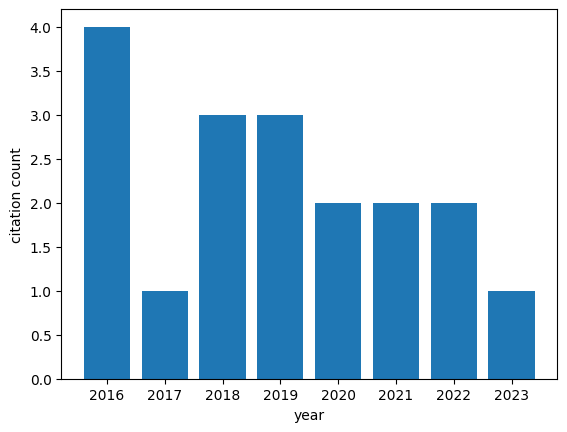

In [21]:
from s23openalex import Works
import bibtexparser

w = Works('https://doi.org/10.1021/acscatal.5b00538')
w

In [22]:
! echo __pycache__ > pkg/.gitignore